In [1]:
#Import Statements
import os
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
#The figure size in width, height in inches
rcParams['figure.figsize'] = 14, 8
#The resolution of figure dots-per-inch.
#rcParams['figure.dpi']=110.0
#The Random is used to generate random numbers every time of execution. So seed function is used to save the state of the random function, so that it can generate same random numbers on multiple execution of the code on the same machine or different machines.
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
#importing the Dataset
data = pd.read_csv('C:/Users/venkataramayya/Desktop/Main Project/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

In [4]:
data.isnull().values.any()

False

In [5]:
data['Class'].unique()

array([0, 1], dtype=int64)

Text(0, 0.5, 'Frequency')

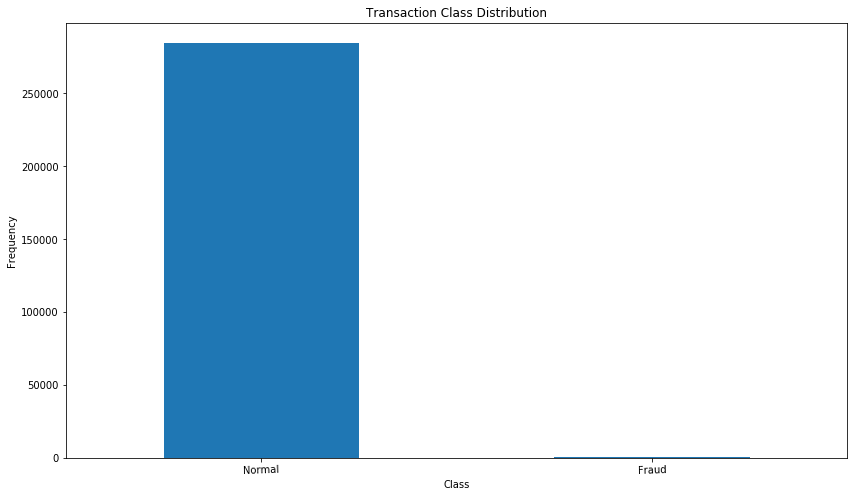

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=2)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

fraud.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.263358,-0.255465,0.209597,-0.196576,0.320502,0.143117,0.231853,-0.183096,0.152750,...,-0.068228,0.133427,0.062406,-0.025825,-0.167605,-0.042885,-0.186088,0.039952,0.048732,NaN
V1,0.263358,1.000000,-0.819226,0.907875,-0.562688,0.894968,0.223961,0.897609,-0.065787,0.631848,...,0.083158,-0.043392,-0.064715,-0.195991,-0.090328,0.133522,0.271335,0.284370,0.048216,NaN
V2,-0.255465,-0.819226,1.000000,-0.876904,0.629688,-0.828391,-0.133373,-0.862983,-0.059535,-0.684573,...,-0.025126,-0.013726,0.199605,0.079638,0.139412,-0.054150,-0.254623,-0.056688,-0.272762,NaN
V3,0.209597,0.907875,-0.876904,1.000000,-0.723766,0.883689,0.383930,0.882312,-0.174837,0.733208,...,0.127262,-0.082243,-0.053028,-0.075581,-0.102828,0.033203,0.193183,0.247184,0.089994,NaN
V4,-0.196576,-0.562688,0.629688,-0.723766,1.000000,-0.550242,-0.310530,-0.678238,0.099480,-0.818853,...,-0.179687,0.196026,0.056657,-0.026260,-0.086619,0.236842,-0.114434,-0.232332,-0.133795,NaN
V5,0.320502,0.894968,-0.828391,0.883689,-0.550242,1.000000,0.198775,0.839738,-0.207546,0.658322,...,0.103431,-0.112837,-0.107258,-0.290589,-0.098699,0.129076,0.249589,0.251549,-0.052031,NaN
V6,0.143117,0.223961,-0.133373,0.383930,-0.310530,0.198775,1.000000,0.151266,-0.743021,0.256004,...,0.096851,0.004450,0.441265,-0.126380,-0.190253,-0.032648,-0.178559,-0.000370,0.228130,NaN
V7,0.231853,0.897609,-0.862983,0.882312,-0.678238,0.839738,0.151266,1.000000,0.133989,0.754725,...,0.118698,-0.146239,-0.119346,-0.156862,0.089469,0.084987,0.326955,0.245928,0.201334,NaN
V8,-0.183096,-0.065787,-0.059535,-0.174837,0.099480,-0.207546,-0.743021,0.133989,1.000000,-0.058956,...,-0.124901,0.038024,-0.449208,0.125535,0.278903,0.063219,0.298508,-0.020636,0.036081,NaN
V9,0.152750,0.631848,-0.684573,0.733208,-0.818853,0.658322,0.256004,0.754725,-0.058956,1.000000,...,0.309410,-0.345583,-0.088287,-0.078098,0.012611,-0.177040,0.236227,0.275593,0.132235,NaN


In [12]:
normal.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.116489,-0.008408,-0.441001,-0.104329,0.172963,-0.064131,8.417234e-02,-0.035954,-0.010577,...,0.047081,0.144257,0.051167,-0.016259,-0.233290,-4.135318e-02,-0.003859,-0.009442,-0.010634,NaN
V1,0.116489,1.000000,0.022537,-0.047511,0.020927,-0.031465,-0.006405,-5.356252e-02,0.004444,-0.018962,...,0.001542,0.000627,0.000720,0.000269,0.001181,-3.337293e-04,-0.003843,-0.001883,-0.231250,NaN
V2,-0.008408,0.022537,1.000000,0.037855,-0.018318,0.023772,0.004879,4.203396e-02,-0.000308,0.016215,...,-0.003208,0.000054,-0.002049,0.000359,-0.001272,-1.713001e-04,0.002333,-0.000455,-0.536546,NaN
V3,-0.441001,-0.047511,0.037855,1.000000,0.039621,-0.048840,-0.013294,-8.485279e-02,0.012717,-0.033957,...,0.002536,0.001591,0.000592,-0.000909,0.001990,6.214473e-04,-0.002033,-0.001536,-0.219130,NaN
V4,-0.104329,0.020927,-0.018318,0.039621,1.000000,0.020792,0.007452,4.128382e-02,-0.004830,0.019998,...,-0.002162,-0.001545,-0.000146,0.001056,0.000022,-1.424070e-03,-0.001003,0.000076,0.099802,NaN
V5,0.172963,-0.031465,0.023772,-0.048840,0.020792,1.000000,-0.006130,-5.411916e-02,0.010285,-0.019872,...,0.000190,0.001672,0.001603,0.000992,0.001354,-4.320713e-04,-0.004159,-0.001932,-0.392782,NaN
V6,-0.064131,-0.006405,0.004879,-0.013294,0.007452,-0.006130,1.000000,-1.083798e-02,0.011390,-0.005735,...,0.000552,0.000013,-0.002824,-0.000057,0.000848,2.721747e-04,0.002261,0.000420,0.216433,NaN
V7,0.084172,-0.053563,0.042034,-0.084853,0.041284,-0.054119,-0.010838,1.000000e+00,-0.004257,-0.037696,...,0.001388,0.003348,0.002671,-0.000012,-0.000794,-5.954729e-07,-0.008393,-0.002432,0.416628,NaN
V8,-0.035954,0.004444,-0.000308,0.012717,-0.004830,0.010285,0.011390,-4.257049e-03,1.000000,0.003386,...,0.005968,-0.000810,0.011596,-0.000932,-0.004385,-7.163256e-04,-0.010754,0.000151,-0.106694,NaN
V9,-0.010577,-0.018962,0.016215,-0.033957,0.019998,-0.019872,-0.005735,-3.769580e-02,0.003386,1.000000,...,-0.002533,0.002909,0.000623,-0.000449,0.000250,1.126413e-03,-0.001473,-0.000871,-0.044684,NaN


In [13]:
#Covariance provides the a measure of strength of correlation between two variable or more set of variables. The covariance matrix element Cij is the covariance of xi and xj. The element Cii is the variance of xi.

#If COV(xi, xj) = 0 then variables are uncorrelated
#If COV(xi, xj) > 0 then variables positively correlated
#If COV(xi, xj) > < 0 then variables negatively correlated

In [14]:
fraud.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.288222e+09,85459.694307,-52439.823156,71295.225365,-27018.585108,82367.083325,12720.845527,79928.751990,-59538.593755,18273.698069,...,-12628.253621,9539.333100,4715.534679,-636.910057,-6391.545498,-967.606367,-12255.428590,1045.948924,598356.236915,0.0
V1,8.545969e+04,46.018406,-23.847878,43.794412,-10.967737,32.617246,2.823018,43.882737,-3.033747,10.719487,...,2.182731,-0.439944,-0.693475,-0.685481,-0.488495,0.427233,2.534144,1.055768,83.956230,0.0
V2,-5.243982e+04,-23.847878,18.414532,-26.758335,7.764063,-19.098064,-1.063468,-26.688456,-1.736706,-7.346757,...,-0.417191,-0.088033,1.353042,0.176195,0.476925,-0.109603,-1.504311,-0.133133,-300.442495,0.0
V3,7.129523e+04,43.794412,-26.758335,50.565429,-14.787966,33.759835,5.072862,45.215785,-8.451459,13.039158,...,3.501549,-0.874077,-0.595650,-0.277096,-0.582921,0.111365,1.891281,0.961981,164.262051,0.0
V4,-2.701859e+04,-10.967737,7.764063,-14.787966,8.255955,-8.493980,-1.657912,-14.044519,1.943070,-5.884170,...,-1.997713,0.841826,0.257155,-0.038903,-0.198411,0.320988,-0.452689,-0.365351,-98.678081,0.0
V5,8.236708e+04,32.617246,-19.098064,33.759835,-8.493980,28.863413,1.984311,32.513099,-7.579811,8.845201,...,2.150092,-0.906049,-0.910254,-0.804907,-0.422723,0.327088,1.846116,0.739631,-71.751251,0.0
V6,1.272085e+04,2.823018,-1.063468,5.072862,-1.657912,1.984311,3.452623,2.025621,-9.385248,1.189642,...,0.696328,0.012357,1.295189,-0.121073,-0.281823,-0.028614,-0.456789,-0.000377,108.806609,0.0
V7,7.992875e+04,43.882737,-26.688456,45.215785,-14.044519,32.513099,2.025621,51.937575,6.564191,13.602703,...,3.309907,-1.575179,-1.358648,-0.582843,0.514024,0.288895,3.244058,0.969988,372.439590,0.0
V8,-5.953859e+04,-3.033747,-1.736706,-8.451459,1.943070,-7.579811,-9.385248,6.564191,46.210501,-1.002284,...,-3.285243,0.386330,-4.823658,0.439975,1.511449,0.202706,2.793741,-0.076775,62.957384,0.0
V9,1.827370e+04,10.719487,-7.346757,13.039158,-5.884170,8.845201,1.189642,13.602703,-1.002284,6.254479,...,2.994076,-1.291735,-0.348779,-0.100699,0.025142,-0.208840,0.813363,0.377209,84.886552,0.0


In [15]:
normal.cov()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.254732e+09,10674.544605,-653.213502,-30561.160458,-6932.207902,11144.617793,-4049.819623,4.711524e+03,-1982.574087,-547.112465,...,1602.344699,4957.054710,1510.097283,-467.676680,-5767.790652,-9.469358e+02,-73.264786,-147.760784,-126286.396385,0.0
V1,1.067454e+04,3.724182,0.071161,-0.133811,0.056513,-0.082396,-0.016437,-1.218488e-01,0.009960,-0.039863,...,0.002133,0.000876,0.000864,0.000314,0.001186,-3.105804e-04,-0.002965,-0.001197,-111.614496,0.0
V2,-6.532135e+02,0.071161,2.676974,0.090392,-0.041940,0.052777,0.010617,8.107127e-02,-0.000585,0.028902,...,-0.003762,0.000064,-0.002083,0.000356,-0.001084,-1.351587e-04,0.001526,-0.000245,-219.559106,0.0
V3,-3.056116e+04,-0.133811,0.090392,2.129933,0.080915,-0.096722,-0.025802,-1.459801e-01,0.021553,-0.053987,...,0.002653,0.001681,0.000537,-0.000803,0.001512,4.373725e-04,-0.001187,-0.000739,-79.984777,0.0
V4,-6.932208e+03,0.056513,-0.041940,0.080915,1.958134,0.039480,0.013868,6.809976e-02,-0.007849,0.030484,...,-0.002168,-0.001564,-0.000127,0.000895,0.000016,-9.609855e-04,-0.000561,0.000035,34.928865,0.0
V5,1.114462e+04,-0.082396,0.052777,-0.096722,0.039480,1.841318,-0.011062,-8.656854e-02,0.016207,-0.029375,...,0.000185,0.001641,0.001352,0.000816,0.000956,-2.827379e-04,-0.002256,-0.000864,-133.302720,0.0
V6,-4.049820e+03,-0.016437,0.010617,-0.025802,0.013868,-0.011062,1.768669,-1.699089e-02,0.017591,-0.008308,...,0.000526,0.000013,-0.002334,-0.000046,0.000587,1.745561e-04,0.001202,0.000184,71.989616,0.0
V7,4.711524e+03,-0.121849,0.081071,-0.145980,0.068100,-0.086569,-0.016991,1.389598e+00,-0.005828,-0.048408,...,0.001172,0.002856,0.001957,-0.000008,-0.000488,-3.385095e-07,-0.003956,-0.000945,122.833271,0.0
V8,-1.982574e+03,0.009960,-0.000585,0.021553,-0.007849,0.016207,0.017591,-5.827624e-03,1.348579,0.004284,...,0.004968,-0.000681,0.008370,-0.000656,-0.002651,-4.011556e-04,-0.004993,0.000058,-30.988499,0.0
V9,-5.471125e+02,-0.039863,0.028902,-0.053987,0.030484,-0.029375,-0.008308,-4.840763e-02,0.004284,1.186731,...,-0.001978,0.002294,0.000422,-0.000296,0.000142,5.917497e-04,-0.000641,-0.000313,-12.174376,0.0


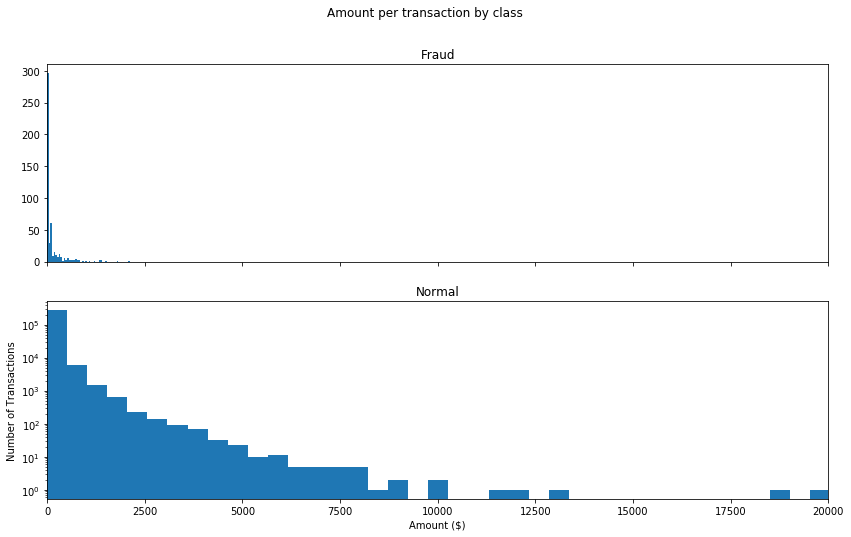

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

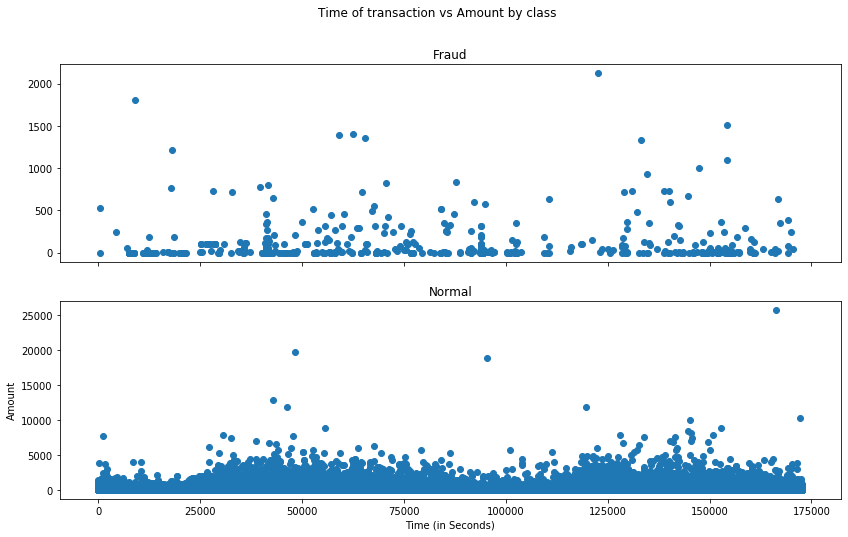

In [17]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [18]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [19]:
data.shape

(284807, 31)

In [20]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]
print("Fraud Cases : {}".format(len(Fraud)))

Valid = data1[data1['Class']==0]
print("Valid Cases : {}".format(len(Valid)))

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier_Fraction : {}".format(outlier_fraction))

Fraud Cases : 49
Valid Cases : 28432
Outlier_Fraction : 0.0017234102419808666


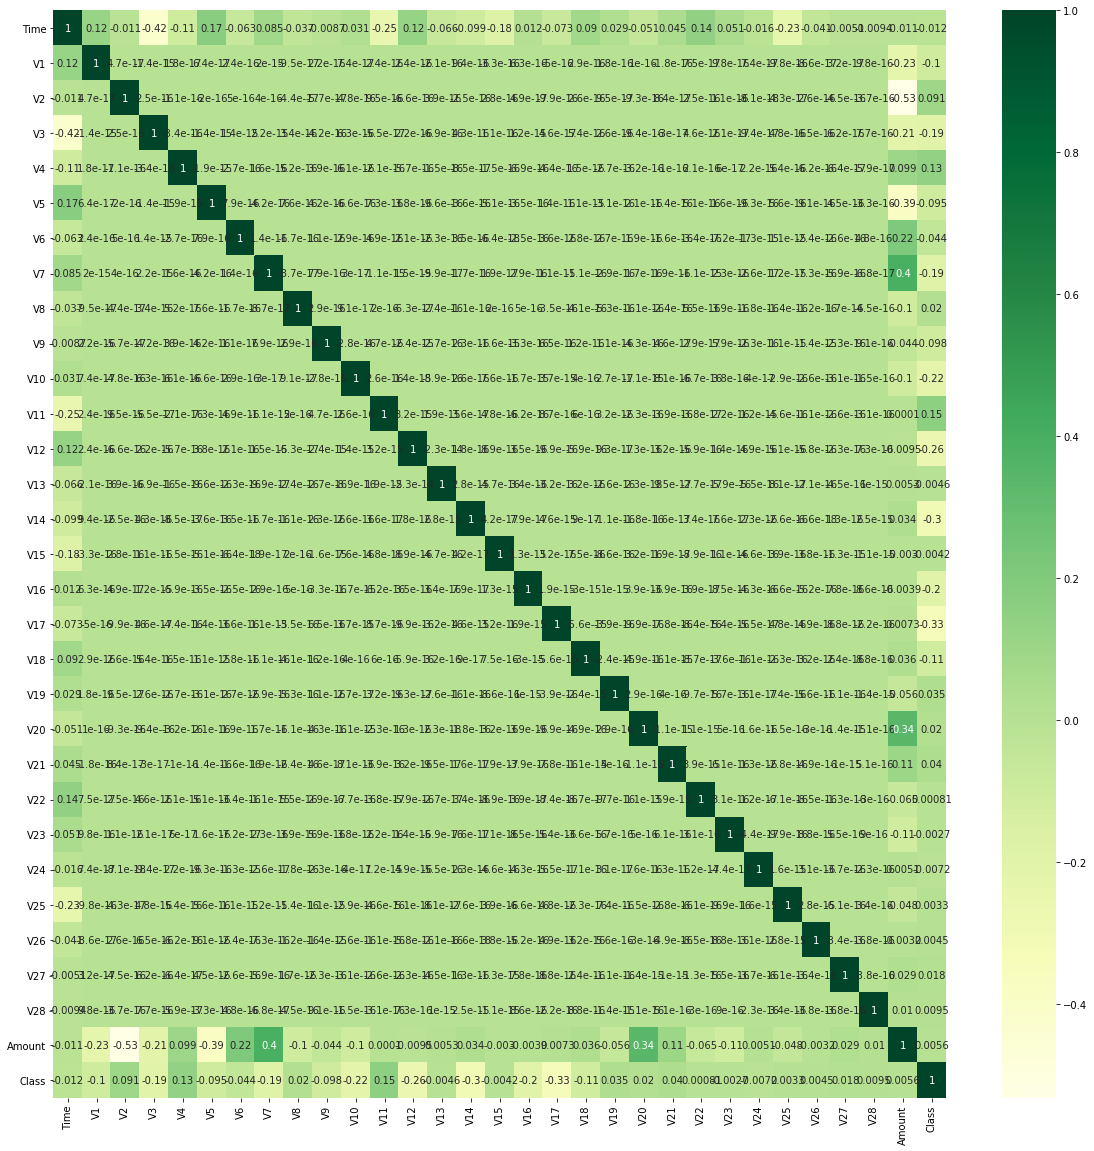

In [21]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGn")

In [22]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [23]:
#Examine the target variable ‘Class’ which is the variable to predict
#Get a count of diagnosis observations by type
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 ----> Normal

1 ----> Fraud

In [24]:
#creating target series
target=data['Class']
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [25]:
#dropping the target variable from the data set
data.drop('Class',axis=1,inplace=True)
data.shape

(284807, 30)

In [26]:
#converting them to numpy arrays
X=np.array(data)
y=np.array(target)
X.shape
y.shape

(284807,)

In [27]:
#distribution of the target variable
k = len(y[y==1])
print(k)
j = len(y[y==0])
print(j)

492
284315


# Normalization

In [28]:
#Apply normalization to rescale the features to a standard range of values.
#Normalize the numeric variables from column2 to column 31 in the dataframe
from sklearn import preprocessing, neighbors
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

# Splitting the Dataset into Train and Test

In [29]:
#splitting the data set into train and test (75:25)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


In [30]:
X_train

array([[ 1.59708000e+05, -4.59481640e-01,  1.19822999e+00, ...,
         1.14877057e-01,  9.36151263e-02,  2.72300000e+01],
       [ 1.29139000e+05,  1.87856258e+00,  2.07846148e-02, ...,
         1.63749473e-02, -5.38916954e-02,  0.00000000e+00],
       [ 4.26300000e+03, -1.46741433e+00,  1.21054225e+00, ...,
        -2.98852703e-01,  1.61527972e-02,  1.53000000e+02],
       ...,
       [ 5.50950000e+04, -1.14996324e+00,  1.69646167e+00, ...,
        -1.62046536e-01,  3.11927890e-02,  7.58000000e+00],
       [ 1.62728000e+05,  1.75455368e+00, -6.99398285e-01, ...,
        -5.85290816e-03, -1.96220758e-02,  9.48000000e+01],
       [ 7.85760000e+04, -7.07635006e-01,  4.93302266e-01, ...,
        -3.85588609e-01, -2.05588932e-01,  5.78000000e+01]])

In [31]:
X_test

array([[ 1.19907000e+05, -6.11711999e-01, -7.69705324e-01, ...,
         6.65013699e-02,  2.21179560e-01,  1.79000000e+00],
       [ 7.83400000e+04, -8.14681711e-01,  1.31921886e+00, ...,
         1.62427330e-01,  5.94562455e-02,  1.98000000e+00],
       [ 8.23820000e+04, -3.18193485e-01,  1.11861770e+00, ...,
         2.49049701e-01,  9.25156059e-02,  8.90000000e-01],
       ...,
       [ 6.24280000e+04, -6.60659594e-01,  1.02446960e+00, ...,
        -1.84290711e-02,  1.15014077e-01,  0.00000000e+00],
       [ 1.51937000e+05, -1.41128753e+00, -3.84119629e-01, ...,
        -3.53327788e-03, -7.27660328e-02,  1.15000000e+01],
       [ 1.21016000e+05,  2.15414730e+00, -1.25568904e+00, ...,
         3.07075647e-02, -5.46807334e-02,  9.90000000e+00]])

In [32]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Prediction
Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

# Isolation Forest Classifier 

In [34]:
#Build Isolation Forest Classifier

#Importing Isolation Forest Classifier
from sklearn.ensemble import IsolationForest

#Creating a Isolation Forest Classifier object
if_clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto',
                         max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

#Fitting Classifier For Training Set and Testing Set
if_clf_train = if_clf.fit(X_train, y_train)

if_clf_test = if_clf.fit(X_test, y_test) 

In [35]:
#Predicting the Test Set results
if_y_test= if_clf.predict(X_test)
print("Test set predictions:\n {}".format(if_y_test))

print("Test set score: {:.2f}".format(np.mean(if_y_test == y_test)))

#Predicting the Train Set results
if_y_train= if_clf.predict(X_train)
print("Test set predictions:\n {}".format(if_y_train))

print("Train set score: {:.2f}".format(np.mean(if_y_train == y_train)))

Test set predictions:
 [1 1 1 ... 1 1 1]
Test set score: 0.00
Test set predictions:
 [1 1 1 ... 1 1 1]
Train set score: 0.00


In [36]:
#Accuracy score on Test
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_test, if_y_test) * 100))
#print("Recall score : %f" %(recall_score(y_test, if_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, if_y_test) * 100))
print(confusion_matrix(y_test, if_y_test)) 
print(classification_report(y_test, if_y_test, labels=[1,0]))


Accuracy score: 0.030898
ROC score : 11.725892

[[    0     0     0]
 [ 2582     0 68509]
 [   89     0    22]]
              precision    recall  f1-score   support

           1       0.00      0.20      0.00       111
           0       0.00      0.00      0.00     71091

   micro avg       0.00      0.00      0.00     71202
   macro avg       0.00      0.10      0.00     71202
weighted avg       0.00      0.00      0.00     71202



In [37]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train, if_y_train) * 100))
#print("Recall score : %f" %(recall_score(y_train, if_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, if_y_train) * 100))
print(confusion_matrix(y_train, if_y_train))
print(classification_report(y_train, if_y_train, labels=[1,0]))


Accuracy score: 0.034643
ROC score : 11.533783

[[     0      0      0]
 [  7772      0 205452]
 [   307      0     74]]
              precision    recall  f1-score   support

           1       0.00      0.19      0.00       381
           0       0.00      0.00      0.00    213224

   micro avg       0.00      0.00      0.00    213605
   macro avg       0.00      0.10      0.00    213605
weighted avg       0.00      0.00      0.00    213605



In [38]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

if_precision_test =precision_score(y_test, if_y_test, average='weighted', zero_division=1)  
print(if_precision_test)
if_precision_train =precision_score(y_train, if_y_train, average='weighted', zero_division=1)
print(if_precision_train)

0.9984415554831173
0.9982169760994557


In [39]:
#Evaluate model
#train 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [40]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
if_acc_train = cross_val_score(if_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
if_proba_train = cross_val_predict(if_clf_train, X_train_std, y_train, cv=3, method='predict')
if_scores_train = if_proba_train[:, ]

#for Test
if_acc_test = cross_val_score(if_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
if_proba_test = cross_val_predict(if_clf_test, X_test_std, y_test, cv=3, method='predict')
if_scores_test = if_proba_test[:, ]

AUC Score (Isolation Forest Classification For Train): 0.10 


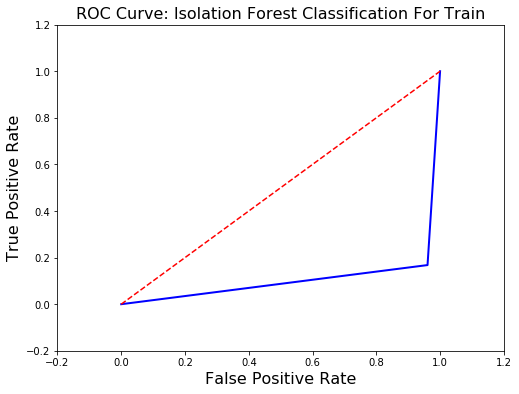

In [41]:
#Plot ROC Curve for Train
ROC_curve('Isolation Forest Classification For Train', y_train, if_scores_train)

AUC Score (Isolation Forest Classification For Test): 0.13 


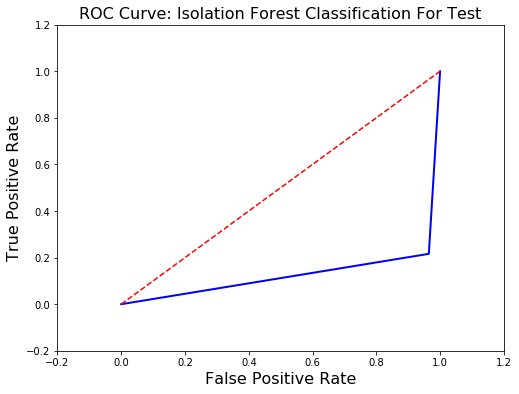

In [42]:
#Plot ROC Curve for Test
ROC_curve('Isolation Forest Classification For Test', y_test, if_scores_test)

#  Local Outlier Factor

In [43]:
#Build Local Outlier Factor

#Importing Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

#Creating a Local Outlier Factor object
lcf_clf = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',
                             novelty=True, contamination=0.1, n_jobs=None)

#Fitting Classifier For Training Set and Testing Set
lcf_clf_train = lcf_clf.fit(X_train, y_train)

lcf_clf_test = lcf_clf.fit(X_test, y_test) 

In [44]:
#Predicting the Test Set results
lcf_y_test= lcf_clf.predict(X_test)
print("Test set predictions:\n {}".format(lcf_y_test))

print("Test set score: {:.2f}".format(np.mean(lcf_y_test == y_test)))

#Predicting the Train Set results
lcf_y_train= lcf_clf.predict(X_train)
print("Test set predictions:\n {}".format(lcf_y_train))

print("Train set score: {:.2f}".format(np.mean(lcf_y_train == y_train)))

Test set predictions:
 [1 1 1 ... 1 1 1]
Test set score: 0.00
Test set predictions:
 [ 1  1 -1 ...  1  1  1]
Train set score: 0.00


In [45]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_test, lcf_y_test) * 100))
#print("Recall score : %f" %(recall_score(y_test, lcf_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, lcf_y_test) * 100))
print(confusion_matrix(y_test, lcf_y_test)) 
print(classification_report(y_test, lcf_y_test, labels=[1,0]))


Accuracy score: 0.123592
ROC score : 43.743535

[[    0     0     0]
 [ 5835     0 65256]
 [   23     0    88]]
              precision    recall  f1-score   support

           1       0.00      0.79      0.00       111
           0       0.00      0.00      0.00     71091

   micro avg       0.00      0.00      0.00     71202
   macro avg       0.00      0.40      0.00     71202
weighted avg       0.00      0.00      0.00     71202



In [46]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_train, lcf_y_train) * 100))
#print("Recall score : %f" %(recall_score(y_train, lcf_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, lcf_y_train) * 100))
print(confusion_matrix(y_train, lcf_y_train)) 
print("\n",classification_report(y_train, lcf_y_train, labels=[1,0]))


Accuracy score: 0.137169
ROC score : 43.614793

[[     0      0      0]
 [ 22019      0 191205]
 [    88      0    293]]

               precision    recall  f1-score   support

           1       0.00      0.77      0.00       381
           0       0.00      0.00      0.00    213224

   micro avg       0.00      0.00      0.00    213605
   macro avg       0.00      0.38      0.00    213605
weighted avg       0.00      0.00      0.00    213605



In [47]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

lcf_precision_test =precision_score(y_test, lcf_y_test, average='weighted', zero_division=1)  
print(lcf_precision_test)
lcf_precision_train =precision_score(y_train, lcf_y_train, average='weighted', zero_division=1)
print(lcf_precision_train)

0.9984431544872087
0.9982190629715408


In [48]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [ ]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

#n_error_test = y_pred_test[y_pred_test == -1].size
#n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
lcf_acc_train = cross_val_score(lcf_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lcf_proba_train = cross_val_predict(lcf_clf_train, X_train_std, y_train, cv=3, method='predict_proba')
lcf_scores_train = if_proba_train[:, 1]

#for Test
lcf_acc_test = cross_val_score(lcf_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
lcf_proba_test = cross_val_predict(lcf_clf_test, X_test_std, y_test, cv=3, method='predict_proba')
lcf_scores_test = lcf_proba_test[:, 1]

In [ ]:
#Plot ROC Curve for Train
ROC_curve('Local Outiler Factor For Train', y_train, lcf_scores_train)

In [ ]:
#Plot ROC Curve for Train
ROC_curve('Local Outlier Factor For Test', y_test, lcf_scores_test)

# Support Vector Machine

In [107]:
#Build Support Vector Machine

#Importing Support Vector Machine
from sklearn import svm

#Creating a Support Vector Machine object
svm_clf = svm.SVC(probability=True)

#Fitting Classifier For Training Set and Testing Set
svm_clf_train = svm_clf.fit(X_train, y_train)

svm_clf_test = svm_clf.fit(X_test, y_test) 

In [50]:
#Predicting The Test Set Results
svm_y_test = svm_clf.predict(X_test)  #test
print("Test set predictions:\n {}".format(svm_y_test))

print("Test set score: {:.2f}".format(np.mean(svm_y_test == y_test)))

#Predicting The Train Set Results
svm_y_train = svm_clf.predict(X_train)  #train 
print("Train set predictions:\n {}".format(svm_y_train))

print("Train set score: {:.2f}".format(np.mean(svm_y_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 1.00
Train set predictions:
 [0 0 0 ... 0 0 0]
Train set score: 1.00


In [51]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_test,svm_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, svm_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, svm_y_test) * 100))
print(confusion_matrix(y_test, svm_y_test)) 
print("\n",classification_report(y_test, svm_y_test, labels=[1,0]))


Accuracy score: 99.844106
Recall score : 0.000000
ROC score : 50.000000

[[71091     0]
 [  111     0]]

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       111
           0       1.00      1.00      1.00     71091

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



In [52]:
#Accuracy score on  Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_train, svm_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train, svm_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, svm_y_train) * 100))
print(confusion_matrix(y_train, svm_y_train)) 
print("\n",classification_report(y_train, svm_y_train, labels=[1,0]))


Accuracy score: 99.821633
Recall score : 0.000000
ROC score : 50.000000

[[213224      0]
 [   381      0]]

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       381
           0       1.00      1.00      1.00    213224

    accuracy                           1.00    213605
   macro avg       0.50      0.50      0.50    213605
weighted avg       1.00      1.00      1.00    213605



In [53]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

svm_precision_test =precision_score(y_test, svm_y_test, average='weighted', zero_division=1)  
print(svm_precision_test)
svm_precision_train =precision_score(y_train, svm_y_train, average='weighted', zero_division=1)
print(svm_precision_train)

0.9984434853359745
0.9982195153521168


In [54]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = metrics.roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [ ]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
svm_acc_train = cross_val_score(svm_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
svm_proba_train = cross_val_predict(svm_clf_train, X_train_std, y_train, cv=3, method='predict_proba')
svm_score_train = svm_proba_train[:, 1]

#for Test
svm_acc_test = cross_val_score(svm_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
svm_proba_test = cross_val_predict(svm_clf_test, X_test_std, y_test, cv=3, method='predict_proba')
svm_score_test = svm_proba_test[:, 1]

In [ ]:
#Plot ROC Curve for Train
ROC_curve('Support Vector Machine For Train', y_train, svm_score_train)

In [ ]:
#Plot ROC Curve for Train
ROC_curve('Support Vector Machine For Test', y_test, svm_score_test)

# kNearest Neighbors

In [55]:
#Importing kNearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

#Creating Object For kNearest Neighbor
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                                     algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                                     metric_params=None, n_jobs=None)

#Fitting Classifier to the Training set and Testing Set
kn_clf_train = clf.fit(X_train, y_train)

kn_clf_test = clf.fit(X_test, y_test)

In [56]:
#Predicting the Test Set results
y_pred_test=clf.predict(X_test)
print("Test set predictions:\n {}".format(y_pred_test))

print("Test set score: {:.2f}".format(np.mean(y_pred_test == y_test)))

#Predicting the Train Set results
y_pred_train=clf.predict(X_train)
print("Test set predictions:\n {}".format(y_pred_train))

print("Train set score: {:.2f}".format(np.mean(y_pred_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 1.00
Test set predictions:
 [0 0 0 ... 0 0 0]
Train set score: 1.00


In [57]:
#Accuracy score on Test 
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred_test) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred_test) * 100))
print(confusion_matrix(y_test, y_pred_test)) 
print("\n",classification_report(y_test, y_pred_test, labels=[1,0]))


Accuracy score: 99.845510
Recall score : 0.900901
ROC score : 50.450450

[[71091     0]
 [  110     1]]

               precision    recall  f1-score   support

           1       1.00      0.01      0.02       111
           0       1.00      1.00      1.00     71091

    accuracy                           1.00     71202
   macro avg       1.00      0.50      0.51     71202
weighted avg       1.00      1.00      1.00     71202



In [58]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_train,y_pred_train) * 100))
print("Recall score : %f" %(recall_score(y_train, y_pred_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, y_pred_train) * 100))
print(confusion_matrix(y_train, y_pred_train)) 
print("\n",classification_report(y_train, y_pred_train, labels=[1,0]))


Accuracy score: 99.821633
Recall score : 0.000000
ROC score : 50.000000

[[213224      0]
 [   381      0]]

               precision    recall  f1-score   support

           1       0.00      0.00      0.00       381
           0       1.00      1.00      1.00    213224

    accuracy                           1.00    213605
   macro avg       0.50      0.50      0.50    213605
weighted avg       1.00      1.00      1.00    213605



In [59]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

kn_precision_test =precision_score(y_test, y_pred_test, average='weighted', zero_division=1)  
print(kn_precision_test)
kn_precision_train =precision_score(y_train, y_pred_train, average='weighted', zero_division=1)
print(kn_precision_train)

0.9984574863266961
0.9982195153521168


In [60]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [ ]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
kn_acc_train = cross_val_score(kn_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
kn_proba_train = cross_val_predict(kn_clf_train, X_train_std, y_train, cv=3, method='predict_proba')
kn_scores_train = kn_proba_train[:, 1]

#for Test
kn_acc_test = cross_val_score(kn_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
kn_proba_test = cross_val_predict(kn_clf_test, X_test_std, y_test, cv=3, method='predict_proba')
kn_scores_test = kn_proba_test[:, 1]

In [ ]:
#Plot ROC Curve for Train
ROC_curve('kNearest Neighbors of Train', y_train, kn_scores_train)

In [ ]:
#Plot ROC Curve for Test
ROC_curve('kNearest Neighbors of Test', y_test, kn_scores_test)

# Logistic Regression

In [61]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

#Creating object for Logistic Regression
lr_cls = LogisticRegression(random_state =0, solver='lbfgs', intercept_scaling=1, class_weight='balanced',
                            max_iter=10000, multi_class='auto', verbose=0, n_jobs=None, l1_ratio=None)


#Fitting Classifier for Training Set and Testing Set
lr_cls_train = lr_cls.fit(X_train, y_train)

lr_cls_test = lr_cls.fit(X_test, y_test)

In [62]:
#Predicting The Test Set Results
lr_y_test = lr_cls.predict(X_test)  #test
print("Test set predictions:\n {}".format(lr_y_test))

print("Test set score: {:.2f}".format(np.mean(lr_y_test == y_test)))

#Predicting The Train Set Results
lr_y_train = lr_cls.predict(X_train)  #train 
print("Train set predictions:\n {}".format(lr_y_train))

print("Train set score: {:.2f}".format(np.mean(lr_y_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 0.95
Train set predictions:
 [0 1 0 ... 0 0 0]
Train set score: 0.95


In [63]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_test,lr_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, lr_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, lr_y_test) * 100))
print(confusion_matrix(y_test, lr_y_test)) 
print("\n",classification_report(y_test, lr_y_test, labels=[1,0]))


Accuracy score: 94.599871
Recall score : 91.891892
ROC score : 93.247995

[[67255  3836]
 [    9   102]]

               precision    recall  f1-score   support

           1       0.03      0.92      0.05       111
           0       1.00      0.95      0.97     71091

    accuracy                           0.95     71202
   macro avg       0.51      0.93      0.51     71202
weighted avg       1.00      0.95      0.97     71202



In [64]:
#Accuracy score on  Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

print("\nAccuracy score: %f" %(accuracy_score(y_train,lr_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train, lr_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, lr_y_train) * 100))
print(confusion_matrix(y_train, lr_y_train)) 
print("\n",classification_report(y_train, lr_y_train, labels=[1,0]))


Accuracy score: 94.670537
Recall score : 91.601050
ROC score : 93.138536

[[201872  11352]
 [    32    349]]

               precision    recall  f1-score   support

           1       0.03      0.92      0.06       381
           0       1.00      0.95      0.97    213224

    accuracy                           0.95    213605
   macro avg       0.51      0.93      0.52    213605
weighted avg       1.00      0.95      0.97    213605



In [65]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

lr_precision_test =precision_score(y_test, lr_y_test, average='weighted', zero_division=1)  
print(lr_precision_test)
lr_precision_train =precision_score(y_train, lr_y_train, average='weighted', zero_division=1)
print(lr_precision_train)

0.9983478414442634
0.9981113259546525


In [66]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = metrics.roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [67]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
lr_acc_train = cross_val_score(lr_cls_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba_train = cross_val_predict(lr_cls_train, X_train_std, y_train, cv=3, method='predict_proba')
lr_score_train = lr_proba_train[:, 1]

#for Test
lr_acc_test = cross_val_score(lr_cls_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba_test = cross_val_predict(lr_cls_test, X_test_std, y_test, cv=3, method='predict_proba')
lr_score_test = lr_proba_test[:, 1]

AUC Score (logistic regression for Train): 0.98 


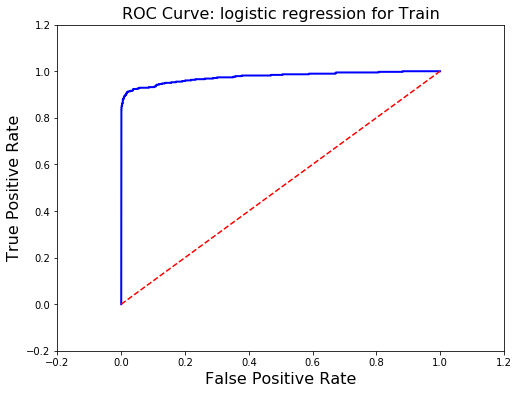

In [68]:
#Plot ROC Curve for train
ROC_curve('logistic regression for Train', y_train, lr_score_train)

AUC Score (logistic regression for Test): 0.95 


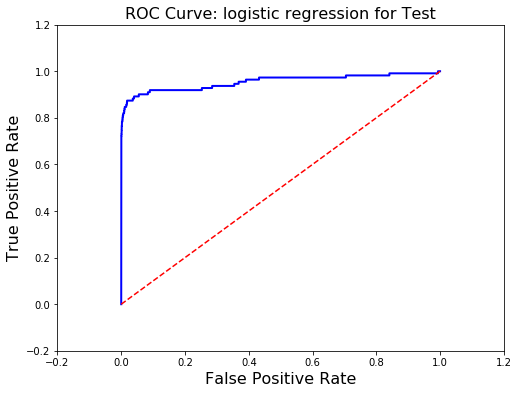

In [69]:
#Plot ROC Curve for test
ROC_curve('logistic regression for Test', y_test, lr_score_test)

# Naive Bayes Classification

In [70]:
#Import Naibe Bayes Classification
from sklearn.naive_bayes import GaussianNB

#creating Navie Bayes Classifier object
nb_classfier =GaussianNB()

#Fitting Classifier For Training Set and Testing Set
nb_cls_train=nb_classfier.fit(X_train, y_train)

nb_cls_test=nb_classfier.fit(X_test,y_test)

In [71]:
#Predicting The Test Set Results
nb_y_test = nb_classfier.predict(X_test)  #test
print("Test set predictions:\n {}".format(nb_y_test))

print("Test set score: {:.2f}".format(np.mean(nb_y_test == y_test)))

#Predicting The Train Set Results
nb_y_train = nb_classfier.predict(X_train)  #train 
print("Train set predictions:\n {}".format(nb_y_train))

print("Train set score: {:.2f}".format(np.mean(nb_y_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 0.99
Train set predictions:
 [0 0 0 ... 0 0 0]
Train set score: 0.99


In [72]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,nb_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, nb_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, nb_y_test) * 100))
print(confusion_matrix(y_test, nb_y_test)) 
print("\n",classification_report(y_test, nb_y_test, labels=[1,0]))


Accuracy score: 99.136260
Recall score : 66.666667
ROC score : 82.926812

[[70513   578]
 [   37    74]]

               precision    recall  f1-score   support

           1       0.11      0.67      0.19       111
           0       1.00      0.99      1.00     71091

    accuracy                           0.99     71202
   macro avg       0.56      0.83      0.59     71202
weighted avg       1.00      0.99      0.99     71202



In [73]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,nb_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train, nb_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, nb_y_train) * 100))
print(confusion_matrix(y_train, nb_y_train)) 
print("\n",classification_report(y_train, nb_y_train, labels=[1,0]))


Accuracy score: 99.139065
Recall score : 66.666667
ROC score : 82.931878

[[211512   1712]
 [   127    254]]

               precision    recall  f1-score   support

           1       0.13      0.67      0.22       381
           0       1.00      0.99      1.00    213224

    accuracy                           0.99    213605
   macro avg       0.56      0.83      0.61    213605
weighted avg       1.00      0.99      0.99    213605



In [74]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

nb_precision_test =precision_score(y_test, nb_y_test, average='weighted', zero_division=1)  
print(nb_precision_test)
nb_precision_train =precision_score(y_train, nb_y_train, average='weighted', zero_division=1)
print(nb_precision_train)

0.99809435734469
0.9978477689209493


In [75]:
#Evaluate model
#train 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_nb_prob=nb_classfier.predict_proba(X_train)[:,1]
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [76]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
nb_acc_train = cross_val_score(nb_cls_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba_train = cross_val_predict(nb_cls_train, X_train_std, y_train, cv=3, method='predict_proba')
nb_scores_train = nb_proba_train[:, 1]

#for Test
nb_acc_test = cross_val_score(nb_cls_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba_test = cross_val_predict(nb_cls_test, X_test_std, y_test, cv=3, method='predict_proba')
nb_scores_test = nb_proba_test[:, 1]

AUC Score (Naive Bayes Classification For Train): 0.96 


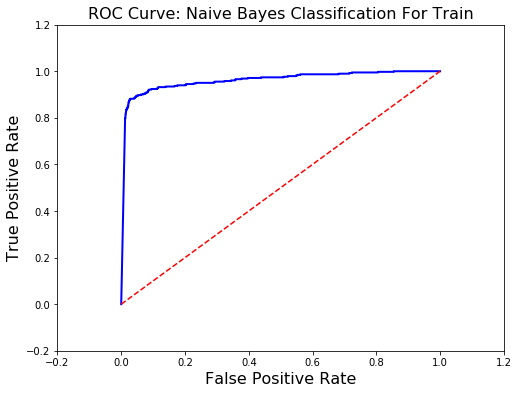

In [77]:
#Plot ROC Curve for Train
ROC_curve('Naive Bayes Classification For Train', y_train, nb_scores_train)

AUC Score (Naive Bayes Classification For Test): 0.95 


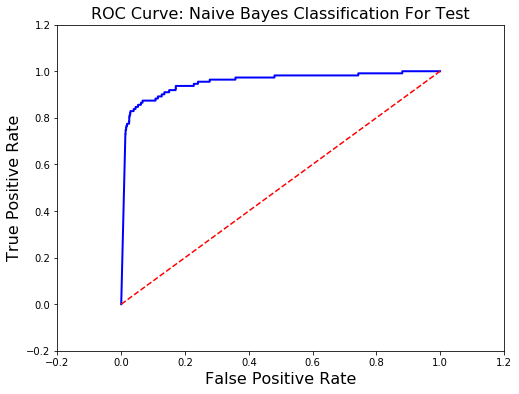

In [78]:
#Plot ROC Curve for Test
ROC_curve('Naive Bayes Classification For Test', y_test, nb_scores_test)

# K-Means Clustering

In [79]:
#importing Kmeans

from sklearn.cluster import KMeans

#create a kmeans objects

km = KMeans(n_clusters=2)

#Fitting Classifier For Training Set and Testing Set

km_clu_train = km.fit(X_train,y_train)

km_clu_test = km.fit(X_test,y_test)

In [80]:
#Predicting The Test Set Results
km_y_test = km.predict(X_test)  #test
print("Test set predictions:\n {}".format(km_y_test))

print("Test set score: {:.2f}".format(np.mean(km_y_test == y_test)))

#Predicting The Train Set Results
km_y_train = km.predict(X_train)  #train 
print("Train set predictions:\n {}".format(km_y_train))

print("Train set score: {:.2f}".format(np.mean(km_y_train == y_train)))

Test set predictions:
 [1 0 0 ... 0 1 1]
Test set score: 0.54
Train set predictions:
 [1 1 0 ... 0 1 0]
Train set score: 0.54


In [81]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,km_y_test) * 100))
#print("Recall score : %f" %(recall_score(y_test, km_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, km_y_test) * 100))
print(confusion_matrix(y_test, km_y_test)) 
print("\n",classification_report(y_test, km_y_test, labels=[1,0]))


Accuracy score: 53.881913
ROC score : 46.322148

[[38322 32769]
 [   68    43]]

               precision    recall  f1-score   support

           1       0.00      0.39      0.00       111
           0       1.00      0.54      0.70     71091

    accuracy                           0.54     71202
   macro avg       0.50      0.46      0.35     71202
weighted avg       1.00      0.54      0.70     71202



In [82]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,km_y_train) * 100))
#print("Recall score : %f" %(recall_score(y_train, km_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, km_y_train) * 100))
print(confusion_matrix(y_train, km_y_train)) 
print("\n",classification_report(y_train, km_y_train, labels=[1,0]))


Accuracy score: 53.649025
ROC score : 42.461337

[[114478  98746]
 [   262    119]]

               precision    recall  f1-score   support

           1       0.00      0.31      0.00       381
           0       1.00      0.54      0.70    213224

    accuracy                           0.54    213605
   macro avg       0.50      0.42      0.35    213605
weighted avg       1.00      0.54      0.70    213605



In [83]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

km_precision_test =precision_score(y_test, km_y_test, average='weighted', zero_division=1)  
print(km_precision_test)
km_precision_train =precision_score(y_train, km_y_train, average='weighted', zero_division=1)
print(km_precision_train)

0.9966745647608003
0.9959391302905575


In [84]:
#Evaluate model
#train 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [85]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
km_acc_train = cross_val_score(km_clu_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
km_proba_train = cross_val_predict(km_clu_train, X_train_std, y_train, cv=3, method='predict')
km_scores_train = km_proba_train[:, ]


#for Test
km_acc_test = cross_val_score(km_clu_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
km_proba_test = cross_val_predict(km_clu_test, X_test_std, y_test, cv=3, method='predict')
km_scores_test = km_proba_test[:, ]

AUC Score (K-Means Clustering for Train): 0.54 


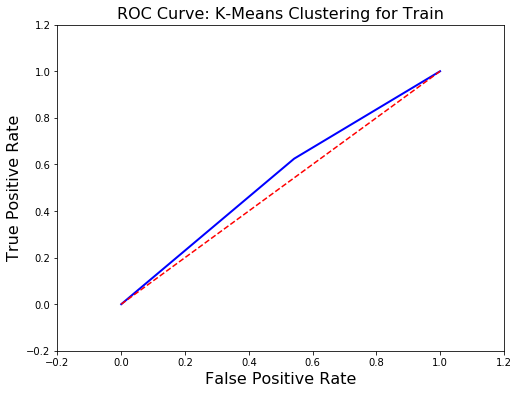

In [86]:
#Plot ROC Curve for Train
ROC_curve('K-Means Clustering for Train', y_train, km_scores_train)

AUC Score (K-Means Clustering for Test): 0.52 


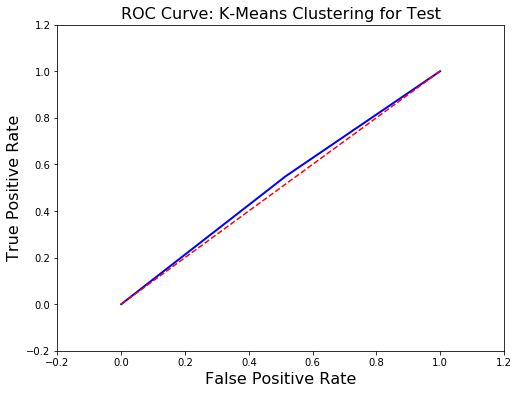

In [87]:
#Plot ROC Curve for Test
ROC_curve('K-Means Clustering for Test', y_test, km_scores_test)

# Decision Tree Classifier

In [88]:
#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Creating a Decision Tree Classifier object
dtc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                 random_state=None, max_leaf_nodes=None)

#Fitting Classifier For Training Set and Testing Set

dtc_clf_train = dtc_clf.fit(X_train, y_train)

dtc_clf_test = dtc_clf.fit(X_test, y_test)

In [89]:
#Predicting The Test Set Results
dtc_y_test = dtc_clf.predict(X_test)  #test
print("Test set predictions:\n {}".format(dtc_y_test))

print("Test set score: {:.2f}".format(np.mean(dtc_y_test == y_test)))

#Predicting The Train Set Results
dtc_y_train = dtc_clf.predict(X_train)  #train 
print("Train set predictions:\n {}".format(dtc_y_train))

print("Train set score: {:.2f}".format(np.mean(dtc_y_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 1.00
Train set predictions:
 [0 0 0 ... 0 0 0]
Train set score: 1.00


In [90]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,dtc_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, dtc_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, dtc_y_test) * 100))
print(confusion_matrix(y_test, dtc_y_test)) 
print("\n",classification_report(y_test, dtc_y_test, labels=[1,0]))


Accuracy score: 100.000000
Recall score : 100.000000
ROC score : 100.000000

[[71091     0]
 [    0   111]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           0       1.00      1.00      1.00     71091

    accuracy                           1.00     71202
   macro avg       1.00      1.00      1.00     71202
weighted avg       1.00      1.00      1.00     71202



In [91]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,dtc_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train, dtc_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, dtc_y_train) * 100))
print(confusion_matrix(y_train, dtc_y_train)) 
print("\n",classification_report(y_train, dtc_y_train, labels=[1,0]))


Accuracy score: 99.906369
Recall score : 72.965879
ROC score : 86.460194

[[213127     97]
 [   103    278]]

               precision    recall  f1-score   support

           1       0.74      0.73      0.74       381
           0       1.00      1.00      1.00    213224

    accuracy                           1.00    213605
   macro avg       0.87      0.86      0.87    213605
weighted avg       1.00      1.00      1.00    213605



In [92]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted', zero_division=1)  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted', zero_division=1)
print(dtc_precision_train)

1.0
0.9990564401501784


In [93]:
#Evaluate model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [94]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
dtc_acc_train = cross_val_score(dtc_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
dtc_proba_train = cross_val_predict(dtc_clf_train, X_train_std, y_train, cv=3, method='predict_proba')
dtc_scores_train = dtc_proba_train[:, 1]

#for Test
dtc_acc_test = cross_val_score(dtc_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
dtc_proba_test = cross_val_predict(dtc_clf_test, X_test_std, y_test, cv=3, method='predict_proba')
dtc_scores_test = dtc_proba_test[:, 1]

AUC Score (Decision Tree Classification For Train): 0.88 


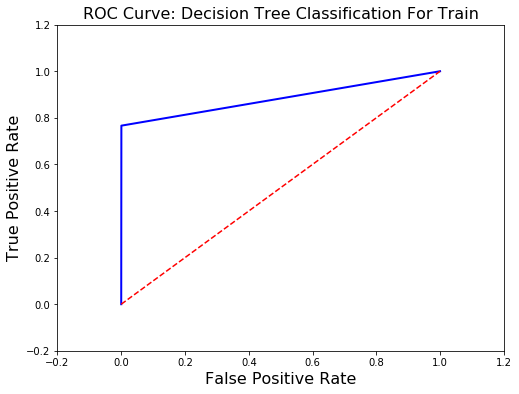

In [95]:
#Plot ROC Curve for Train
ROC_curve('Decision Tree Classification For Train', y_train, dtc_scores_train)

AUC Score (Decision Tree Classification For Test): 0.82 


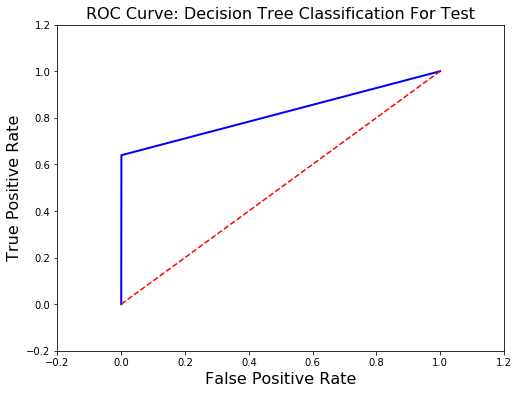

In [96]:
#Plot ROC Curve for Test
ROC_curve('Decision Tree Classification For Test', y_test, dtc_scores_test)

# Random Forest Classifier

In [97]:
#Build Random Forest Calssifier

#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Creating a Random Forest Classifier object
rmf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='auto',
                             max_leaf_nodes=None, n_jobs=None, random_state=None,
                             verbose=0, class_weight=None, ccp_alpha=0.0, max_samples=None)

#Fitting Classifier For Training Set and Testing Set
rmf_clf_train = rmf.fit(X_train, y_train)

rmf_clf_test = rmf.fit(X_test, y_test) 

In [98]:
#Predicting The Test Set Results
rmf_y_test = rmf.predict(X_test)  #test
print("Test set predictions:\n {}".format(rmf_y_test))

print("Test set score: {:.2f}".format(np.mean(rmf_y_test == y_test)))

#Predicting The Train Set Results
rmf_y_train = rmf.predict(X_train)  #train 
print("Train set predictions:\n {}".format(rmf_y_train))

print("Train set score: {:.2f}".format(np.mean(rmf_y_train == y_train)))

Test set predictions:
 [0 0 0 ... 0 0 0]
Test set score: 1.00
Train set predictions:
 [0 0 0 ... 0 0 0]
Train set score: 1.00


In [99]:
#Accuracy score on Test
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,rmf_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test, rmf_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, rmf_y_test) * 100))
print(confusion_matrix(y_test, rmf_y_test)) 
print("\n", classification_report(y_test, rmf_y_test, labels=[1,0]))


Accuracy score: 100.000000
Recall score : 100.000000
ROC score : 100.000000

[[71091     0]
 [    0   111]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           0       1.00      1.00      1.00     71091

    accuracy                           1.00     71202
   macro avg       1.00      1.00      1.00     71202
weighted avg       1.00      1.00      1.00     71202



In [100]:
#Accuracy score on Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,rmf_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train, rmf_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train, rmf_y_train) * 100))
print(confusion_matrix(y_train, rmf_y_train)) 
print("\n",classification_report(y_train, rmf_y_train, labels=[1,0]))


Accuracy score: 99.945694
Recall score : 72.703412
ROC score : 86.348892

[[213212     12]
 [   104    277]]

               precision    recall  f1-score   support

           1       0.96      0.73      0.83       381
           0       1.00      1.00      1.00    213224

    accuracy                           1.00    213605
   macro avg       0.98      0.86      0.91    213605
weighted avg       1.00      1.00      1.00    213605



In [101]:
#Precision score on Test and Train
from sklearn.metrics import precision_score

rmf_precision_test =precision_score(y_test, rmf_y_test, average='weighted', zero_division=1)  
print(rmf_precision_test)
rmf_precision_train =precision_score(y_train, rmf_y_train, average='weighted', zero_division=1)
print(rmf_precision_train)

1.0
0.9994392677345578


In [102]:
#Evaluate model
#train 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

In [103]:
#Evaluating Cross_validation_Scores And Cross_Validation_PredictionProbability

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.model_selection import cross_val_score, cross_val_predict

#for Train
rmf_acc_train = cross_val_score(rmf_clf_train, X_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
rmf_proba_train = cross_val_predict(rmf_clf_train, X_train_std, y_train, cv=3, method='predict_proba')
rmf_scores_train = rmf_proba_train[:, 1]

#for Test
rmf_acc_test = cross_val_score(rmf_clf_test, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)
rmf_proba_test = cross_val_predict(rmf_clf_test, X_test_std, y_test, cv=3, method='predict_proba')
rmf_scores_test = rmf_proba_test[:, 1]

AUC Score (Random Forest Classification For Train): 0.95 


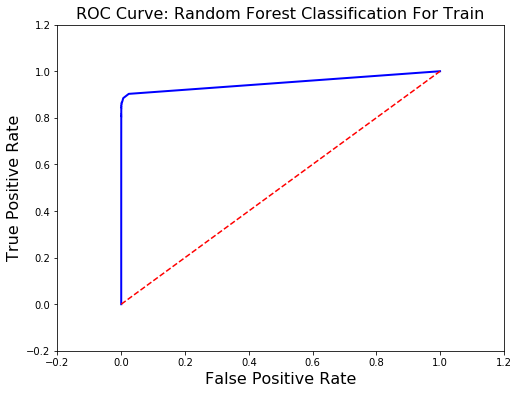

In [104]:
#Plot ROC Curve for Train
ROC_curve('Random Forest Classification For Train', y_train, rmf_scores_train)

AUC Score (Random Forest Classification For Test): 0.91 


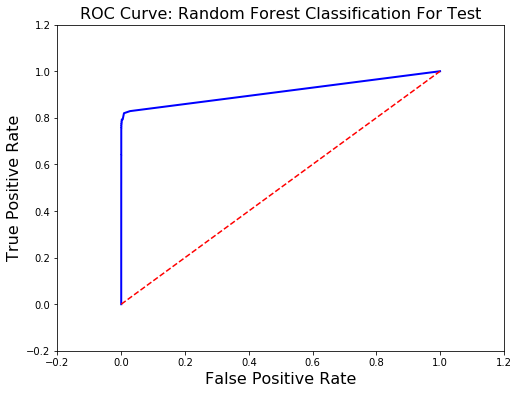

In [105]:
#Plot ROC Curve for Test
ROC_curve('Random Forest Classification For Test', y_test, rmf_scores_test)